https://www.kaggle.com/datasets/anuragupadhyaya/anticancer-peptides-data-set

In [2]:
using Random

"""
Construct a binary vector. By default 10000 elements long.
"""
bitHDV(N::Int=10000) = bitrand(N)


"""
Bundles binary hyperdimensional vectors based on the element-wise majority rule.
"""
function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end


"""
Binds binary hyperdimensional vectors based on an element-wise XOR gate.
"""
bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)


"""
Permutes a binary hyperdimensional vector by an adjustable circular shift.
"""
bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)


"""
Calculates the Hamming distance between two binary vectors.
"""
hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming

In [3]:
using DataFrames, CSV
data = CSV.read("ProtExdata/ACPs_Breast_cancer.csv", DataFrame)

,ID,sequence,class
,Int64,String,String31
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
4,4,ESFSDWWKLLAE,mod. active
5,5,ETFADWWKLLAE,mod. active
6,6,ETFSDWWKLLAE,mod. active
7,7,FAKALAKLAKKLL,mod. active
8,8,FAKALKALLKALKAL,inactive - exp
9,9,FAKFLAKFLKKAL,mod. active


In [4]:
unique(data.class)
class_num = [i == "very active" ? 1 : i == "mod. active" ? 2 : i == "inactive - exp" ? 3 : 4 for i in data.class]
data[!, :class_num] = class_num
first(data, 5)

,ID,sequence,class,class_num
,Int64,String,String31,Int64
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active,2
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active,2
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active,2
4,4,ESFSDWWKLLAE,mod. active,2
5,5,ETFADWWKLLAE,mod. active,2


In [5]:
AA_list = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'O', 'U', 'B', 'J', 'Z', 'X']
AA_hdv = [bitHDV() for i in AA_list]
AA_dict = Dict(zip(AA_list, AA_hdv))

Dict{Char, BitVector} with 26 entries:
  'E' => [1, 1, 0, 1, 1, 0, 0, 1, 1, 1  …  1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
  'Z' => [1, 1, 1, 0, 0, 0, 0, 1, 0, 1  …  1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
  'X' => [0, 0, 1, 1, 1, 0, 0, 1, 0, 1  …  0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
  'C' => [0, 1, 1, 1, 1, 1, 0, 1, 1, 1  …  0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
  'B' => [0, 1, 1, 0, 1, 0, 1, 0, 0, 0  …  0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
  'D' => [0, 1, 0, 0, 1, 1, 0, 1, 1, 1  …  0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
  'A' => [1, 0, 1, 1, 1, 0, 1, 0, 1, 1  …  0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
  'R' => [0, 0, 1, 1, 0, 0, 1, 0, 0, 1  …  0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
  'G' => [1, 0, 1, 0, 1, 0, 1, 1, 0, 0  …  0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
  'N' => [0, 1, 0, 0, 1, 1, 1, 0, 0, 0  …  1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
  'Q' => [0, 1, 0, 0, 1, 0, 1, 0, 1, 1  …  1, 0, 0, 1, 1, 1, 0, 0, 0, 1]
  'M' => [1, 1, 1, 1, 1, 1, 1, 1, 0, 1  …  1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
  'K' => [0, 1, 0, 0, 1, 1, 1, 1, 0, 1  …  1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
  'F' => [0,

In [6]:
trimer_hdvs = Dict(aa1 * aa2 * aa3 => 
bitbind(AA_dict[aa1], bitperm(AA_dict[aa2]), bitperm(AA_dict[aa3], 2)) 
for aa1 in AA_list for aa2 in AA_list for aa3 in AA_list)

Dict{String, BitVector} with 17576 entries:
  "HTY" => [0, 0, 1, 1, 0, 1, 0, 0, 1, 1  …  1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
  "HBJ" => [0, 0, 0, 0, 0, 1, 0, 1, 1, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
  "MSW" => [0, 1, 0, 0, 1, 1, 1, 1, 1, 0  …  0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
  "BKI" => [0, 0, 1, 1, 1, 1, 1, 0, 0, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
  "ETI" => [0, 0, 0, 1, 1, 1, 0, 0, 0, 1  …  1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
  "OLQ" => [0, 1, 0, 0, 0, 1, 1, 0, 1, 1  …  0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
  "NMD" => [1, 1, 1, 0, 0, 0, 1, 0, 1, 1  …  0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
  "YVC" => [1, 1, 1, 0, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
  "QPE" => [1, 1, 1, 0, 0, 0, 1, 1, 0, 1  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
  "KIW" => [1, 0, 0, 1, 1, 0, 0, 1, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
  "BPX" => [1, 0, 1, 1, 1, 0, 1, 1, 1, 0  …  1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
  "NLG" => [0, 1, 0, 1, 0, 0, 1, 1, 1, 1  …  0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
  "YWG" => [1, 1, 0, 0, 0, 1, 1, 1, 1, 1  …  0, 0, 1, 0,

In [7]:
function embedder(sequence)
    l = [trimer_hdvs[sequence[i:i+2]] for i in 1:length(sequence)-2]
    v = bitadd(hcat(l)...)
    return v
end

embedder (generic function with 1 method)

In [8]:
l = BitVector[]
for i in data.sequence
    push!(l, embedder(i))
end
data[!, :hdv] = l

947-element Vector{BitVector}:
 [0, 0, 0, 0, 1, 0, 1, 1, 1, 0  …  0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
 [1, 1, 0, 0, 1, 1, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
 [0, 0, 0, 0, 1, 0, 1, 1, 1, 0  …  0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
 [1, 0, 1, 0, 0, 1, 1, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 1, 1, 1, 1]
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
 [1, 0, 0, 1, 0, 1, 1, 1, 0, 1  …  0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
 [1, 0, 1, 0, 0, 0, 1, 0, 1, 1  …  1, 0, 0, 1, 1, 0, 0, 1, 0, 1]
 [0, 1, 0, 0, 1, 0, 1, 1, 1, 0  …  0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
 [1, 1, 0, 0, 1, 0, 0, 0, 1, 1  …  1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0  …  0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
 [1, 0, 0, 1, 1, 1, 1, 0, 0, 0  …  0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
 [1, 0, 0, 1, 1, 1, 1, 0, 1, 1  …  0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 1, 0, 0, 1, 0, 1, 1  …  0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
 ⋮
 [1, 1, 1, 0, 1, 0, 0, 1, 0, 0  …  0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1  …  1, 1, 0, 1, 1, 1, 1, 

In [13]:
active_hdv = bitadd(hcat([i for i in data[data.class_num .== 1, :hdv]])...)
modactive_hdv = bitadd(hcat([i for i in data[data.class_num .== 2, :hdv]])...)
notactive_exp_hdv = bitadd(hcat([i for i in data[data.class_num .== 3, :hdv]])...)
notactive_virt_hdv = bitadd(hcat([i for i in data[data.class_num .== 4, :hdv]])...)

10000-element BitVector:
 1
 0
 0
 0
 1
 0
 1
 1
 1
 1
 0
 1
 0
 ⋮
 1
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 0

In [14]:
# A random active peptide
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_exp_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_virt_hdv))

0.3069
0.3642
0.3811
0.479


In [16]:
# A random mod. active peptide
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., notactive_exp_hdv))
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., notactive_virt_hdv))

0.5006
0.4781
0.4976
0.4859


In [17]:
# A random inactive (exp?) peptide
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., notactive_exp_hdv))
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., notactive_virt_hdv))

0.4826
0.4721
0.4528
0.5019


In [15]:
# A random inactive (virtual?) peptide
println(hamming(data[data.sequence .== "DALEIFKTLFSLVMRFSSYL", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "DALEIFKTLFSLVMRFSSYL", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "DALEIFKTLFSLVMRFSSYL", :hdv]..., notactive_exp_hdv))
println(hamming(data[data.sequence .== "DALEIFKTLFSLVMRFSSYL", :hdv]..., notactive_virt_hdv))

0.5022
0.5053
0.5086
0.4747


In [19]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(PCA, matrix_all ; maxoutdim=2)
projS = projection(S)
S

PCA(indim = 947, outdim = 2, principalratio = 0.04595932467675847)

Pattern matrix (unstandardized loadings):
───────────────────────────────
              PC1           PC2
───────────────────────────────
1     0.0437272    -0.01638
2     0.0481556    -0.021572
3     0.00809181    0.0264646
4     0.0485717    -0.00553457
5     0.0428504    -0.0103146
6     0.0429416    -0.00597843
7     0.378713     -0.0631421
8     0.127999      0.292501
9     0.121422      0.0764487
10    0.0420815    -0.0287659
11    0.173927      0.309087
12    0.144439     -0.0364043
13    0.342007     -0.123255
14    0.358673     -0.0922578
15    0.374831     -0.117362
16    0.392736     -0.155573
17    0.341429     -0.0889422
18    0.337293     -0.0939774
19    0.3666       -0.1143
20    0.354432      0.0417436
21    0.298848     -0.0626016
22    0.383911     -0.0658033
23    0.360248     -0.0167526
24    0.313939     -0.127405
25    0.376577     -0.041791
26    0.376962     -0.139988
27    0.375291     -0.1433

In [36]:
indices = [[i for i in 1:nrow(data) if data.class_num[i] == j] for j in 1:4]

4-element Vector{Vector{Int64}}:
 [27, 28, 69, 86, 88, 91, 92, 93, 100, 127, 128, 138, 142, 154, 160, 177, 194, 196]
 [1, 2, 3, 4, 5, 6, 7, 9, 12, 16  …  174, 176, 178, 179, 182, 185, 186, 190, 193, 197]
 [8, 10, 11, 13, 14, 15, 17, 23, 25, 26  …  180, 181, 183, 184, 187, 188, 189, 191, 192, 195]
 [198, 199, 200, 201, 202, 203, 204, 205, 206, 207  …  938, 939, 940, 941, 942, 943, 944, 945, 946, 947]

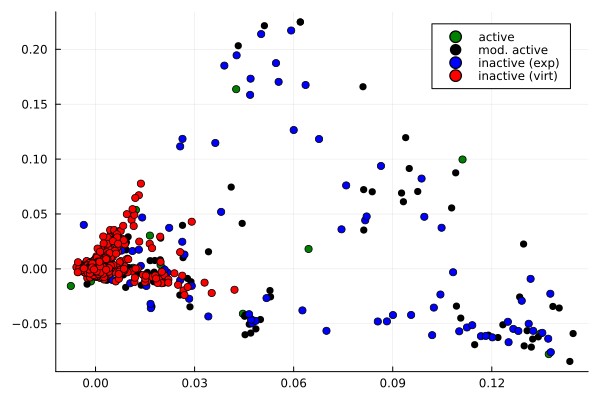

In [47]:
using Plots

function plotter()
    colors = [:green, :black, :blue, :red]
    labels = ["active", "mod. active", "inactive (exp)", "inactive (virt)"]
    fig = Plots.plot()

    for i in 1:4
        scatter!(fig, (projS[indices[i], 1], projS[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    return fig
end

plotter()

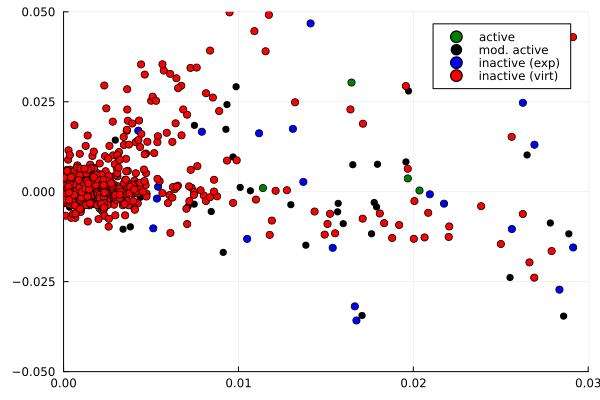

In [49]:
using Plots

function plotter()
    colors = [:green, :black, :blue, :red]
    labels = ["active", "mod. active", "inactive (exp)", "inactive (virt)"]
    fig = Plots.plot(xlims=(0,0.03), ylims = (-0.05, 0.05))

    for i in 1:4
        scatter!(fig, (projS[indices[i], 1], projS[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    return fig
end

plotter()

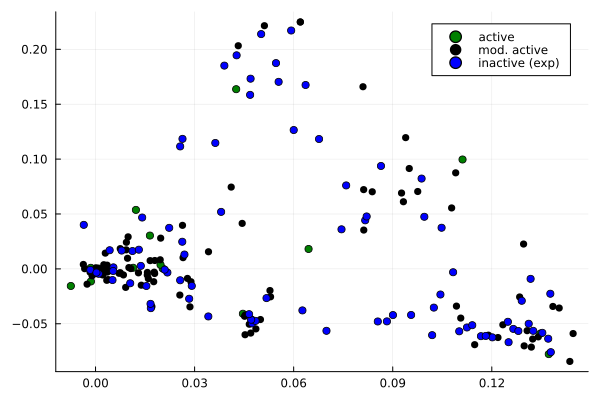

In [50]:
using MultivariateStats

matrix_all_conc = permutedims(hcat(data[data.class_num .< 4, :hdv]...))

S_conc = fit(PCA, matrix_all_conc ; maxoutdim=2)
projS_conc = projection(S)
S_conc

using Plots

function plotter()
    colors = [:green, :black, :blue]
    labels = ["active", "mod. active", "inactive (exp)"]
    fig = Plots.plot()

    for i in 1:3
        scatter!(fig, (projS_conc[indices[i], 1], projS_conc[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    return fig
end

plotter()

PCA cant explain these vectors well enough in 2 dimensions! (highest explaind variance 3%...)
Let's build a simple classiefier and test this.

In [60]:
n = nrow(data)

train = rand(n) .< 0.8
test = train = .! train

train_df = data[[i for i in 1:n if train[i] == 1], :]

active_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 1, :hdv]])...)
modactive_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 2, :hdv]])...)
notactive_exp_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 3, :hdv]])...)
notactive_virt_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 4, :hdv]])...)

10000-element BitVector:
 0
 0
 1
 0
 1
 0
 1
 1
 1
 1
 0
 1
 1
 ⋮
 0
 0
 0
 0
 0
 1
 1
 1
 1
 1
 0
 0